## Stock Prediction Using Neural Network

Required Libraries

In [ ]:
# mount drive using PyDrive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

!pip install mxnet
import mxnet as mx
import xgboost as xgb

import math
import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## Drive Mount 

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
data_link = "https://drive.google.com/open?id=1d-IDdUaik2iNVsFT99wrKzFZ-PUEdzPG"
_, id = data_link.split('?id=')
print(id)

# Create google drive file bject using id retrieved from the link
file = drive.CreateFile({'id': id})
file.GetContentFile("ADANIPOWER.BO.csv")
print(file)

1d-IDdUaik2iNVsFT99wrKzFZ-PUEdzPG
GoogleDriveFile({'id': '1d-IDdUaik2iNVsFT99wrKzFZ-PUEdzPG', 'kind': 'drive#file', 'etag': '"MTY1MDU3MDI3MzYyNg"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1d-IDdUaik2iNVsFT99wrKzFZ-PUEdzPG', 'webContentLink': 'https://drive.google.com/uc?id=1d-IDdUaik2iNVsFT99wrKzFZ-PUEdzPG&export=download', 'alternateLink': 'https://drive.google.com/file/d/1d-IDdUaik2iNVsFT99wrKzFZ-PUEdzPG/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/1d-IDdUaik2iNVsFT99wrKzFZ-PUEdzPG/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/text/csv', 'title': 'ADANIPOWER.BO.csv', 'mimeType': 'text/csv', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2022-04-21T19:09:12.433Z', 'modifiedDate': '2022-04-21T19:44:33.626Z', 'modifiedByMeDate': '2022-04-21T19:44:33.626Z', 'lastViewedByMeDate': '2022-04-21T19:44:33.

In [ ]:
# date parser function
def date_parser(date):
  return datetime.datetime.strptime(date, '%Y-%m-%d')

In [ ]:
df = pd.read_csv("ADANIPOWER.BO.csv", header=0, parse_dates=[0], date_parser=date_parser)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-08-20,105.000000,107.900002,98.500000,100.050003,100.050003,96423800.0
1,2009-08-21,99.400002,103.900002,98.500000,103.199997,103.199997,19475100.0
2,2009-08-24,104.599998,104.599998,101.650002,103.050003,103.050003,7606000.0
3,2009-08-25,101.099998,103.099998,101.000000,102.599998,102.599998,4877400.0
4,2009-08-26,102.599998,107.150002,102.599998,105.099998,105.099998,10904200.0


In [ ]:
# number of days and features
df.shape[0], df.shape[1]

(3131, 7)

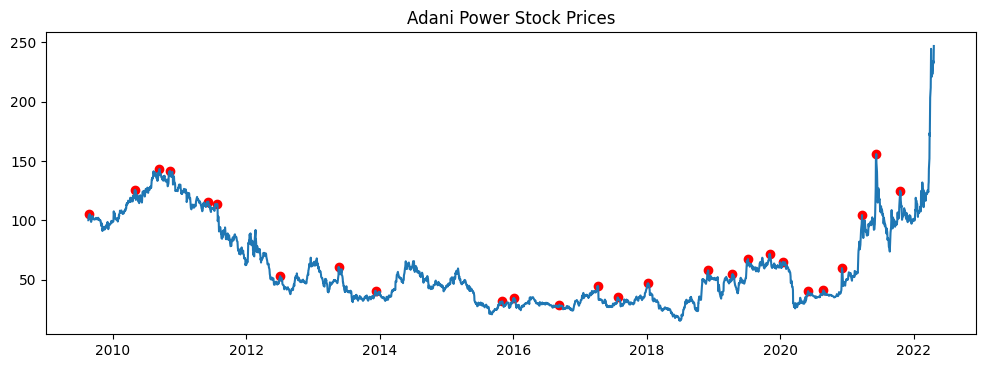

In [ ]:
# plotting Date vs Close Price
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(df['Date'], df['Close'])
plt.title('Adani Power Stock Prices')

# plotting relative maximas
from scipy.signal import argrelextrema
df_arr_date = df['Date'].to_numpy()
df_arr_close = df['Close'].to_numpy()
# type(df['Close'])
c_max_index = argrelextrema(df_arr_close, np.greater, order=30)
plt.scatter(df_arr_date[c_max_index[0]], df_arr_close[c_max_index[0]], c='r')

plt.show()

Following points acan be devised from the above graph:
- prices were low around 2012-2018
- spikes: 
  1. 

**Generating Features**

Features that can be used as indicators:
1. Moving Average & Exponential MA: weekly and monthly
2. Momentum Indicator
3. Bollinger Bands

In [ ]:
# indicators generator function that takes dataset as input and adds indicator columns
def generate_indicators(df):
  # Moving Average:
    # weekly moving average
  df['ma_w'] = df['Close'].rolling(window=7).mean()
    # monthly moving average
  df['ma_m'] = df['Close'].rolling(window=30).mean()

  # Bollinger Bands:

  # Exponential Moving Average:

  # Momentum:

  return df